# Загрузка Pandas и очистка данных

In [1]:
# Импортируем необходимые библиотеки:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from textblob import TextBlob
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor

# инструменты для оценки точности модели
from sklearn import metrics

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 200)  # показывать больше колонок

In [2]:
# объявляем функции

def cuisine_style_to_list(row):
    '''принмает строку, возвращает список'''
    row = row.lower()
    if row != 'other':
        return row.replace('[', '').replace(']', '').replace("'", "").split(', ')
    else:
        return ['other']


def new_list_cuisine_style(row):
    '''Принимает список, возвращает отфильтрованный список'''
    new_list = []
    for style in row:
        if style in new_cuisine_style_list:
            new_list.append(style)
        else:
            if 'other' != new_list:
                new_list.append('other')
    return new_list


def eneble_cuisine(row):
    '''Проверяет есть ли значение во входящем списке
    Возвращает 1 если есть и 0 при отсутствии
    '''
    if name_column in row:
        return 1
    else:
        return 0


def price_range_to_member(line):
    '''
    возвращает 0 если одни знак доллара
    1 если от двух до трех
    2 если их четыре
    '''
    if line == '$':
        return 0
    elif line == '$$ - $$$':
        return 1
    elif line == '$$$$':
        return 2
    else:
        return None

#  Оченка тональности текста


def get_analysisPol(row):
    if len(row) == 2:
        return TextBlob(row[0]).polarity
    else:
        return None


def get_analysisSub(row):
    if len(row) == 2:
        return TextBlob(row[0]).subjectivity
    else:
        return None


def get_date_reviews_1(row):
    '''
    Находит и возвращает дату первого отзыва
    '''
    if len(row) > 1:
        date_list = pattern.findall(row[1])
        return pd.to_datetime(date_list[0])
    else:
        return None


def get_date_reviews_2(row):
    '''
    Находит и возвращает дату второго отзыва
    '''
    if len(row) > 1:
        date_list = pattern.findall(row[1])
        if len(date_list) > 1:
            return pd.to_datetime(date_list[1])
        else:
            return None
    else:
        return None

In [3]:
df = pd.read_csv('main_task.csv')
df.head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [5]:
# приводим названия колонок к единому виду
new_name_columns = []
for column in df.columns.to_list():
    new_name_columns.append(column.replace(' ', '_').lower())
df.columns = new_name_columns

In [6]:
df.head(1)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643


# Работа с id_ta

In [7]:
# Проверим есть ли дубликаты
df.id_ta.value_counts()[:10]

d697406      2
d11698990    2
d13002276    2
d3161682     2
d7337366     2
d7342803     2
d987900      2
d11999956    2
d2477531     2
d7809594     2
Name: id_ta, dtype: int64

Так как в списках есть дубликаты проверим их данные

In [8]:
dub_id_ta = []
for key, value in df.id_ta.value_counts().items():
    if value > 1:
        dub_id_ta.append(key)
len(dub_id_ta)

20

Создали список ключей, у которых есть дубликаты, их 20 шт. Проверим.

In [9]:
for x in dub_id_ta:
    display(df[df.id_ta == x])

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
4578,id_1180,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1181.0,4.0,$$ - $$$,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406
28096,id_1209,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1210.0,4.0,$$ - $$$,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
26431,id_3238,Madrid,NaN,3240.0,4.5,NaN,7.0,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-V...,d11698990
26551,id_3240,Madrid,NaN,3242.0,4.5,NaN,7.0,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-V...,d11698990


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
1579,id_2673,Madrid,['American'],2675.0,5.0,$,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276
26696,id_2485,Madrid,['American'],2487.0,5.0,$,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
25251,id_3575,Madrid,"['Spanish', 'Bar']",3577.0,3.5,$,217.0,"[['Thursday snack', 'Good value for money & go...",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,d3161682
39847,id_3709,Madrid,"['Spanish', 'Bar']",3711.0,3.5,$,217.0,"[['Thursday snack', 'Good value for money & go...",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,d3161682


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
10183,id_1225,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",1227.0,4.0,$$ - $$$,272.0,"[['Simply Excellent!', 'Modern!'], ['10/22/201...",/Restaurant_Review-g187514-d7337366-Reviews-La...,d7337366
32814,id_1197,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",1198.0,4.0,$$ - $$$,272.0,"[['Simply Excellent!', 'Modern!'], ['10/22/201...",/Restaurant_Review-g187514-d7337366-Reviews-La...,d7337366


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
22924,id_2359,Madrid,"['Spanish', 'Mediterranean']",2361.0,4.5,$$ - $$$,16.0,"[['The real codido madrileño'], ['03/31/2017']]",/Restaurant_Review-g187514-d7342803-Reviews-Lo...,d7342803
36275,id_2467,Madrid,"['Spanish', 'Mediterranean']",2469.0,4.5,$$ - $$$,16.0,"[['The real codido madrileño'], ['03/31/2017']]",/Restaurant_Review-g187514-d7342803-Reviews-Lo...,d7342803


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
8019,id_2361,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2363.0,4.0,$$ - $$$,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900
22998,id_2312,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2314.0,4.0,$$ - $$$,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
16920,id_3536,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3538.0,4.0,$$ - $$$,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956
29879,id_3662,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3664.0,4.0,$$ - $$$,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
8421,id_3811,Madrid,['Spanish'],3813.0,4.0,$,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531
24545,id_3805,Madrid,['Spanish'],3807.0,4.0,$,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
15525,id_3967,Madrid,"['American', 'Spanish', 'Asian']",3969.0,3.5,NaN,61.0,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7809594
19388,id_4331,Madrid,"['American', 'Spanish', 'Asian']",4333.0,3.5,NaN,61.0,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7809594


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
10594,id_2677,Madrid,NaN,2679.0,5.0,NaN,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625
12938,id_2486,Madrid,NaN,2488.0,5.0,NaN,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
13942,id_1103,Madrid,['Spanish'],1104.0,4.5,$$ - $$$,73.0,"[['ok for beer, not for dinner'], ['12/20/2017']]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d8753348
31238,id_1212,Madrid,['Spanish'],1213.0,4.5,$$ - $$$,73.0,"[['ok for beer, not for dinner'], ['12/20/2017']]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d8753348


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
10819,id_2197,Madrid,NaN,2199.0,4.5,NaN,16.0,"[[], []]",/Restaurant_Review-g187514-d11921719-Reviews-C...,d11921719
12628,id_2329,Madrid,NaN,2331.0,4.5,NaN,16.0,"[[], []]",/Restaurant_Review-g187514-d11921719-Reviews-C...,d11921719


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
3942,id_5646,Madrid,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",5649.0,3.5,$$ - $$$,443.0,"[['Good Lebanese food', 'Decent place'], ['07/...",/Restaurant_Review-g187514-d3685055-Reviews-Sh...,d3685055
27680,id_5617,Madrid,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",5620.0,3.5,$$ - $$$,443.0,"[['Good Lebanese food', 'Decent place'], ['07/...",/Restaurant_Review-g187514-d3685055-Reviews-Sh...,d3685055


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
13980,id_3239,Madrid,NaN,3241.0,5.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799
38946,id_3242,Madrid,NaN,3244.0,5.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
15295,id_475,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",476.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640
15565,id_530,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
10439,id_468,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",469.0,4.0,$$ - $$$,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077
25785,id_511,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",512.0,4.0,$$ - $$$,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
5240,id_2406,Madrid,"['Italian', 'French', 'European']",2408.0,4.0,$$ - $$$,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170
36822,id_2487,Madrid,"['Italian', 'French', 'European']",2489.0,4.0,$$ - $$$,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
4732,id_3804,Madrid,"['American', 'German', 'European', 'Central Eu...",3806.0,4.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d11674463
11583,id_3810,Madrid,"['American', 'German', 'European', 'Central Eu...",3812.0,4.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d11674463


,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
147,id_4110,Madrid,['Spanish'],4112.0,5.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187514-d4600226-Reviews-Ca...,d4600226
9446,id_4104,Madrid,['Spanish'],4106.0,5.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187514-d4600226-Reviews-Ca...,d4600226


Видно что эти и правдо дубликаты, удалим их из бызы

In [10]:
df = df.drop_duplicates(subset='id_ta', keep='last')

# Работа с restaurant_id

In [11]:
# Посмотрим есть ли дубликаты
df.restaurant_id.value_counts()

id_871      18
id_227      18
id_436      18
id_633      18
id_321      17
            ..
id_7240      1
id_10689     1
id_3845      1
id_13520     1
id_13993     1
Name: restaurant_id, Length: 11907, dtype: int64

Видно что одни и те же id_ встречаются у многих строк.
Посмотрим на некоторые из этих строк и сравним их.

In [12]:
df[df.restaurant_id == 'id_436'].head(3)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
2955,id_436,Barcelona,"['Seafood', 'Mediterranean', 'Spanish', 'Glute...",437.0,4.5,$$ - $$$,546.0,"[['Fresh Fish', 'Perfect concept'], ['01/03/20...",/Restaurant_Review-g187497-d1592613-Reviews-La...,d1592613
4674,id_436,Copenhagen,"['European', 'Spanish', 'Mediterranean', 'Vege...",437.0,4.0,$$ - $$$,89.0,"[['Lovely restaurant', 'Great atmosphere and g...",/Restaurant_Review-g189541-d8738362-Reviews-To...,d8738362
6118,id_436,Oporto,"['European', 'Portuguese', 'Soups', 'Cafe', 'V...",437.0,4.5,$,71.0,"[['Super nice healthy and good', 'Great lunch ...",/Restaurant_Review-g189180-d9463122-Reviews-Ca...,d9463122


In [13]:
df[df.restaurant_id == 'id_871'].head(3)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
756,id_871,Milan,"['Chinese', 'Seafood', 'Vegetarian Friendly']",873.0,4.5,$$ - $$$,69.0,"[['My favourite Chinese Restaurant in Milan', ...",/Restaurant_Review-g187849-d8277124-Reviews-Ri...,d8277124
1172,id_871,Geneva,['International'],876.0,4.0,$$ - $$$,28.0,[['Wild Girls Mess - A place Where Staff igno....,/Restaurant_Review-g188057-d4462793-Reviews-BG...,d4462793
3239,id_871,Zurich,"['Bar', 'Pub']",875.0,4.5,NaN,3.0,"[['Schlager central'], ['04/11/2015']]",/Restaurant_Review-g188113-d7904953-Reviews-Pe...,d7904953


Посмотрев на эти строки, видим, что restaurant_id практически соответстует
ranking. Видимо id напрямую зависит от места, которе занимает среди всех ресторанов своего горада.
Таким образом restaurant_id не даст не какой полезной информации для обучения модели. 
Колонку restaurant_id удалим полностью, что бы она больше не мешала нам.

In [14]:
df = df.drop('restaurant_id', axis=1)

# Работа с city

In [15]:
# Приведем все названия городов к нижнему регистру
df.city = df.city.apply(lambda x: x.lower())

In [16]:
# Можно посмотреть на value_counts, не ограничивая вывод,
# чтобы увидеть, как много там разных значений
df.city.value_counts()[:]

london        5757
paris         4897
madrid        3088
barcelona     2734
berlin        2155
milan         2133
rome          2078
prague        1443
lisbon        1300
vienna        1166
amsterdam     1086
brussels      1060
hamburg        949
munich         893
lyon           892
stockholm      820
budapest       816
warsaw         727
dublin         673
copenhagen     659
athens         628
edinburgh      596
zurich         538
oporto         513
geneva         481
krakow         443
oslo           385
helsinki       376
bratislava     301
luxembourg     210
ljubljana      183
Name: city, dtype: int64

In [17]:
# Копируем колонку, она пригодится для работы с другими колонками
df['cities'] = df.city
# Так как город, йвляется в нашем случае категориальной переменной
# получим из него dummies переменные
# Исмользуем все города, не сокращая их количество
# так как их сокращение плозо влияет на модель
df = pd.get_dummies(df, columns=['city'])

# Работа с cuisine_style

Созданим новую переменную с количеством стилей кухонь у ресторана, а так же созданим новые dummies перемные, сократив их количество, отобрав те, что чаще всего используются.

In [18]:
# Заменем пробуски в строках на 'other'
df.cuisine_style = df.cuisine_style.fillna('other')
# Превратим текст в списки
df.cuisine_style = df.cuisine_style.apply(
    lambda row: cuisine_style_to_list(row))

In [19]:
# Добавим а таблицу новую переменную, в которой будет храниться
# количество кухонь в ресторане.
# 'other' будем считать за 1
df['cuisine_style_count'] = df.cuisine_style.apply(lambda row: len(row))

In [20]:
# Посчитаем, сколько раз встречается каждый стиль
cuisine_style = {}
for x in df['cuisine_style']:
    for i in x:
        if i not in cuisine_style and i != 'other':
            cuisine_style[i] = 1
        elif i != 'other':
            cuisine_style[i] += 1

In [21]:
# Соберем все значения в список
cuisine_style_with_freqs = list(cuisine_style.values())
# Найдем стили, который описывают большинство (90%) примеров:
top_cuisine_style_count = int(np.percentile(cuisine_style_with_freqs, 90))

In [22]:
# Создадим список стилей для dummies переменных
new_cuisine_style_list = []
for key, value in cuisine_style.items():
    if value >= top_cuisine_style_count:
        new_cuisine_style_list.append(key)
new_cuisine_style_list.append('other')

In [23]:
# Создадим колонку где оставим только стили вошедшие в новый список
df['cuisine_style_short'] = df.cuisine_style.apply(
    lambda row: new_list_cuisine_style(row))

In [24]:
# Зоздаем новые dummies переменные стилей
for name_column in new_cuisine_style_list:
    # делаем понятные имена для колонок переменных
    actual_column_name = (
        'cuisine_style_' + name_column).replace(' ', '_').lower()
    df[actual_column_name] = df['cuisine_style_short'].apply(
        lambda row: eneble_cuisine(row))

# Работа с ranking

Посмотрим на максимльные и минимальные значения переменной

In [25]:
df.groupby(['cities'])['ranking'].max().head()

cities
amsterdam     3249.0
athens        1787.0
barcelona     7796.0
berlin        6372.0
bratislava     889.0
Name: ranking, dtype: float64

In [26]:
df.groupby(['cities'])['ranking'].min().head()

cities
amsterdam     1.0
athens        6.0
barcelona     5.0
berlin        2.0
bratislava    3.0
Name: ranking, dtype: float64

Так как разброс значений слишком большой, нормализуем эти значения MinMax нормализаций. Тесты показали, что она работает лучше стандартной нормализации.

In [27]:
# возмем значения колонки
ranking = np.reshape(df.ranking.values, (-1, 1))
# Нормализуем эти значения при помощи метода MinMax из sklearn.preprocessing
scaler = MinMaxScaler()
# Заменим значения в колонке на нормализированные
df['ranking'] = scaler.fit_transform(ranking)

# Работа с price_range

Так как мы знаем, что в price_range хранится размер среднего чека, превратим этот признак в числовой, заменив символы долларов на числа в размере от 0 до 2, в зависимости от знака. Пропуски заменем средним показателем по всем строкам.

In [28]:
# Заменим строки на числа
df['price_range'] = df['price_range'].apply(
    lambda line: price_range_to_member(line))
# Замееим пропуски на среднее значение по всем строкам
df['price_range'] = df['price_range'].fillna(df['price_range'].mean())

# Работа с number_of_reviews

In [29]:
# Заменяем пропуски Number of Reviews среднеарефметическим значением по всему столбцу
df['number_of_reviews'] = df['number_of_reviews'].fillna(
    df['number_of_reviews'].mean())

In [30]:
# возмем значения колонки
reviews = np.reshape(df.number_of_reviews.values, (-1, 1))
# Нормализуем эти значения при помощи метода MinMax из sklearn.preprocessing
scaler = MinMaxScaler()
# Заменим значения в колонке на нормализированные
df['number_of_reviews'] = scaler.fit_transform(reviews)

# Работа с reviews

In [31]:
# Создаем маску для поиска нужного нам текста
# Поделим текст и даты
pattern = re.compile("\[([^\[\]]+)\]")

In [32]:
# Создаем список по маске и примеяем к отзывам
df['reviews'] = df['reviews'].apply(lambda line: pattern.findall(line))

In [33]:
# Добавим колонку с оценкой тональности отзывов
#df['reviews_analysisPol'] = df['reviews'].apply(lambda row: get_analysisPol(row))
df['reviews_analysisSub'] = df['reviews'].apply(
    lambda row: get_analysisSub(row))
#df['reviews_analysisPol'] = df['reviews_analysisPol'].fillna(df['reviews_analysisPol'].mean())
df['reviews_analysisSub'] = df['reviews_analysisSub'].fillna(
    df['reviews_analysisSub'].mean())

In [34]:
# Создаем маску для поиска даты в тексте
pattern = re.compile('\d+\/\d+\/\d+')
# Создаем колонки с датами отзывов
df['date_reviews_1'] = df['reviews'].apply(lambda row: get_date_reviews_1(row))
df['date_reviews_2'] = df['reviews'].apply(lambda row: get_date_reviews_2(row))

In [35]:
# Создадим колонку с количеством дней между отзывами
df['period_reviews'] = df['date_reviews_1'] - df['date_reviews_2']
df['period_reviews'] = df['period_reviews'].apply(lambda x: abs(float(x.days)))

In [36]:
# Грубо заполним происки средним значением
df['period_reviews'] = df['period_reviews'].fillna(df['period_reviews'].mean())

In [37]:
# возмем значения колонки
period_reviews = np.reshape(df.period_reviews.values, (-1, 1))
# Нормализуем эти значения при помощи метода MinMax из sklearn.preprocessing
scaler = MinMaxScaler()
# Заменим значения в колонке на нормализированные
df['period_reviews'] = scaler.fit_transform(period_reviews)

# Работа с url_ta	

Мы можем дополнить данными пропуски в строках, исполбзуя BeautifulSoup и requests, но делать этого не будем, так как это занимает много времени. 
Убедился в этом когда пытался заполнить пропуски в price_range.

 def get_cuisine_style(link):
    '''
    Парсит страницу c информацией о ресторане.
    Ищет в коде тела страници блоки с классами ._3UjHBXYa
    Ищет все блоки div в наййденном коде
    Проверяет в блоках надпись CUISINES
    Возвращает оставшуюсчя строку разбив по элементам
    '''
    domen = 'https://www.tripadvisor.com'
    full_link = domen + link
    r = requests.get(full_link)
    # записывает весь код тела сайта в переменную
    html = BS(r.content, 'html.parser')
    # перебор блоков с данными классами
    for el in html.select('._3UjHBXYa'):
        title = el.find_all('div')
        for x in title:
            if 'CUISINES' in x.text and x.text > 'CUISINES':
                return x.text[8:].split(', ')

# Корреляция

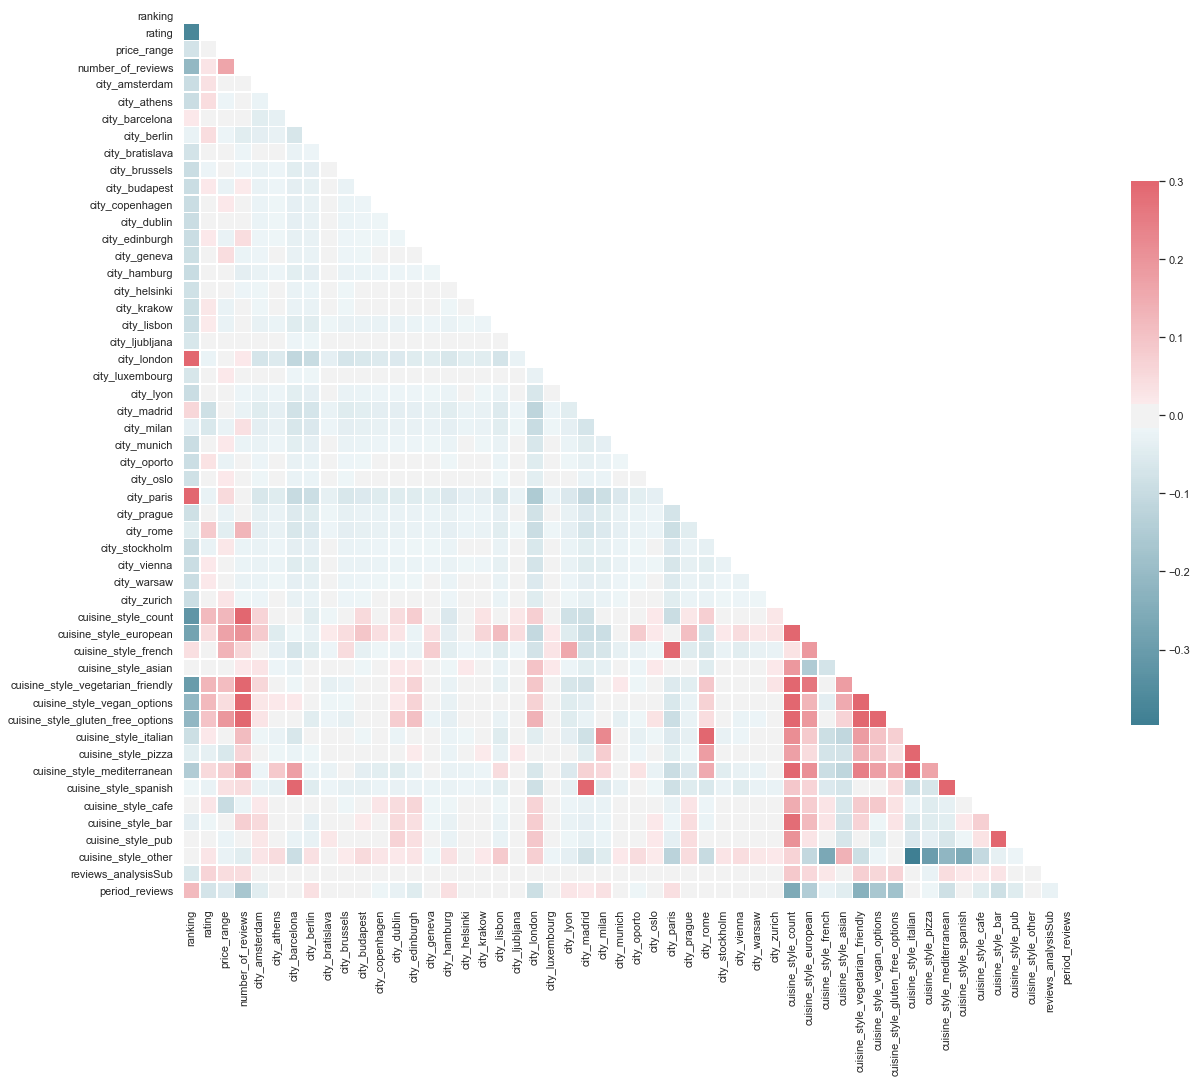

In [38]:
sns.set(style="white")
corr = df.corr()

# создадим маску для треугольника
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# настроим внешний вид
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# настраиваем фигуру
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Из карты видно, что наибольшее влияние на рейтинг дают города, стили кухней и отзывы. Для дальнейшего улучшения работы модели нужно добавить новые признаки связанные с городами(страну, статистеку по туризму и тому подобное), заполнить пропуски в отзывах и стилях кухнь. Так же можно поработать над местом ресторана по городу, Этот признак очень сильно связан с рейтингом.

# Создание полиномиальных признаков

In [39]:
# будем создавать полиномы второй степени
pf = PolynomialFeatures(2)

In [40]:
# Исполюзуем признаки ranking и number_of_reviews
poly_features = pf.fit_transform(df[['ranking', 'number_of_reviews']])
poly_features = poly_features.tolist()

# Создаем колонки из признаков
for i in range(1, 5):
    new_list = []
    for x in poly_features:
        new_list.append(x[i])
    name = 'ranking_number_of_reviews_' + str(i)
    df[name] = new_list

In [41]:
# Исполюзуем признаки cuisine_style_count и ranking
poly_features = pf.fit_transform(
    df[['cuisine_style_count', 'number_of_reviews']])
poly_features = poly_features.tolist()

# Создаем колонки из признаков
for i in range(1, 5):
    new_list = []
    for x in poly_features:
        new_list.append(x[i])
    name = 'cuisine_style_number_of_reviews_' + str(i)
    df[name] = new_list

# Обучение модели

In [42]:
# Ваш код по очистке данных и генерации новых признаков
# Удаляем столбцы имеющие тип Object
df_ml = df.drop(['cuisine_style', 'reviews', 'url_ta', 'id_ta',
                 'cuisine_style_short', 'cities', 'date_reviews_1',
                 'date_reviews_2'], axis=1)

# При необходимости добавьте ячейки

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [43]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df_ml.drop(['rating'], axis=1)
y = df_ml['rating']

In [44]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [45]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [46]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21614907453726862


# Итог

У меня не получилось создать признаки, которые бы улучшили работу модели. Все созданные признаки кроме dummies признаков по городам и стилей кухонь практически не дают положительного результата. Дальнейшую работу над улучшением результата буду заниматься на kaggle, куда перенесу все свои наработки и улучшу их.